### Constructing a de Bruijn graph from an RNA sequence

Jacob L. Fine

April 21st, 2024

We are often interested in the interrelationships between k-mers within a given sequence of DNA, RNA, or protein. In computational biology, de Bruijn graphs are convenient ways to represent string overlaps between all the k-mers that constitute a particular DNA, RNA or protein sequence. To construct a de Bruijn graph from a sequence s, we slide a window accross the sequence to identify every substing of length k and create a list of k-mers K(s). Each kmer_i in K(s) will be a node of the graph. To find the edges, we can iterate through the list of all pairs (kmer_1, kmer_2) of k-mers in K(s) and ask whether the suffix kmer_1[1:] matches the prefix kmer_2[:-1]. If an overlap exists, we draw an arrow from the node of kmer_1 to kmer_2, which constitutes a directed edge in the de Bruijn graph. Such graphs may be useful for assembling short reads into longer biological sequences, such as open reading frames.

In addition to creating a de Bruijn graph, we will also compute the Hamming distance (the number of characters that differ between two strings of equal length) between each pair of kmers, and cluster the kmers by Hamming distance. This provides additional information on the relationships between kmers, based on their sequence similarity. 



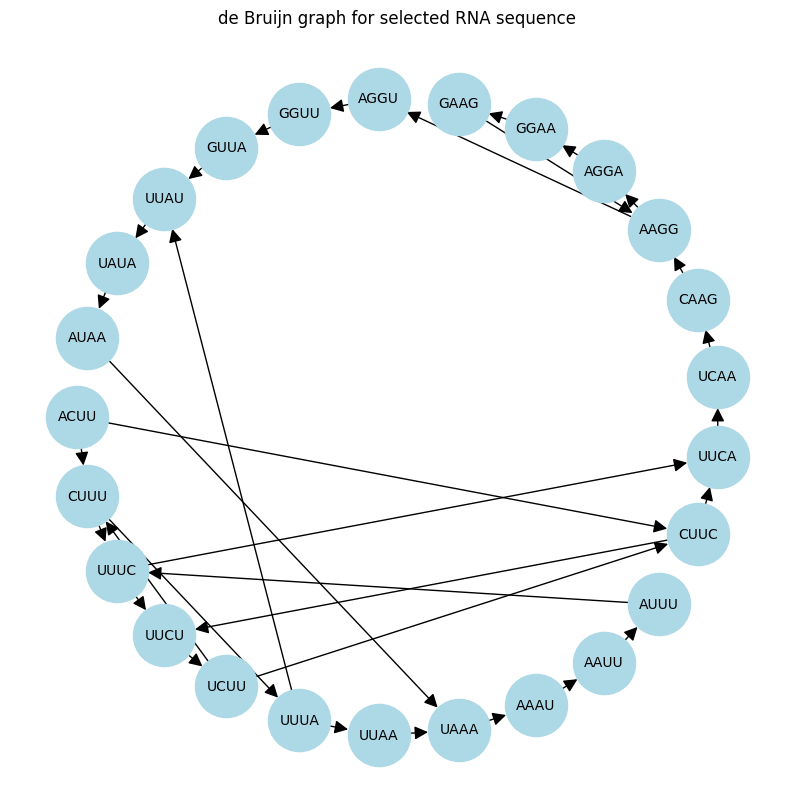

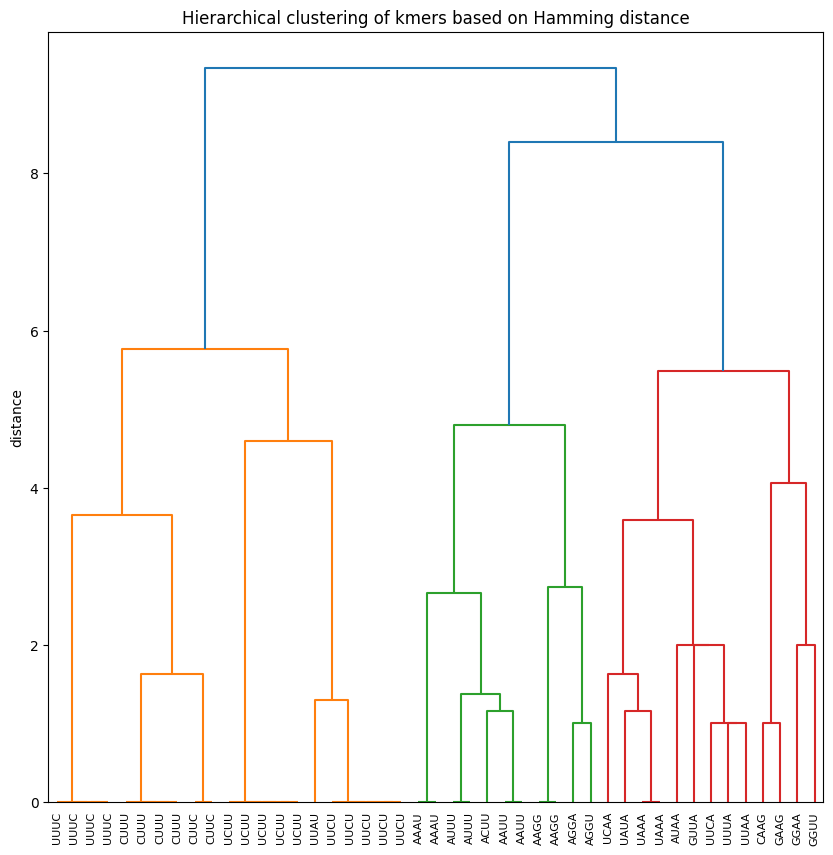

In [3]:
# imports relevant packages

import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import numpy as np

# makes a class to construct the de Bruijn graph
class DBG_maker:
    # defines parameters sequence and k
    def __init__(self, sequence='ACUUUCUUUCUUUAAAUUUCUUUCUUCUUCAAGGAAGGUUAUAAAUUU', K=4):
        self.seq = sequence
        self.k = K

    # applies sliding window to generate the kmers for a given sequence
    def produce_kmers(self):
        kmers = []
        for i in range(len(self.seq) - self.k + 1):
            kmers.append(self.seq[i:i+self.k])
        return kmers

    # constructs the adjacency list as a Python dictionary to store, for each kmer_i, all the kmers_j1,kmers_j2,... 
    # which are such that the suffix of kmer_i matches the prefix of kmers_j1,kmers_j2,... 
    def generate_debruijn_graph(self, kmers):
        edges = {}
        for i in range(len(kmers)):
            for j in range(i+1, len(kmers)):
                if kmers[i][1:] == kmers[j][:-1]:
                    if kmers[i] not in edges:
                        edges[kmers[i]] = []
                    edges[kmers[i]].append(kmers[j])
        return edges

    # computes the Hamming distance between each kmer, defined as the number of characters that differ between two equal length strings
    def hamming_distance(self,kmer1, kmer2):
        return sum(character1 != character2 for character1, character2 in zip(kmer1, kmer2))


# create an instances of the class DBG_maker
dbg = DBG_maker()

# applies the function to produce the kmers
kmers = dbg.produce_kmers()

# applies the function to produce the de Bruijn graph
DBG_dict = dbg.generate_debruijn_graph(kmers)

# converts the adjacency list into a NetworkX DiGraph
graph = nx.DiGraph(DBG_dict)

# adjusts the figure size
plt.figure(figsize=(10, 10))
plt.title('de Bruijn graph for selected RNA sequence')

# plots the de Bruijn graph
pos = nx.shell_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, arrowsize=20)

plt.show()

# makes a distance matrix of the Hamming distances
distance_matrix = pdist(np.array(kmers)[:, None], lambda u, v: dbg.hamming_distance(u[0], v[0]))

# performs hierarchical clustering on the distance matrix
Z = linkage(distance_matrix, 'ward')

# makes a dendrogram depicting the kmers based on the above clustering
plt.figure(figsize=(10, 10))
plt.title('Hierarchical clustering of kmers based on Hamming distance')
plt.ylabel('distance')
dendrogram(Z, labels=kmers, leaf_rotation=90)
plt.show()